In [84]:
import sys
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [133]:
xLen=246
yLen=103
check=np.zeros(xLen*yLen)
type=np.zeros(xLen*yLen)

for i in range(3):
    for j in range(yLen):
        check[i+j*xLen]=1
        type[i+j*xLen]=1
        
for i in range(xLen-3,xLen):
    for j in range(yLen):
        check[i+j*xLen]=1
        type[i+j*xLen]=1

for i in range(xLen):
    for j in range(3):
        check[i+j*xLen]=1
        type[i+j*xLen]=1
    
#ここまで壁粒子の配置設定
ylim=np.zeros(xLen)
#振幅、波長、基準となる水面の高さ
amp=2.5
wavelen=60.0
surf=30.0
pi=np.pi
for i in range(3, xLen-3):
    idash=float(i)
    ylim[i]=surf+np.floor(amp*np.sin(2.0*pi*(idash-3.0)/wavelen))

for i in range(3,xLen-3):
    j=3
    while(j<=ylim[i]):
            check[i+j*xLen]=1
            type[i+j*xLen]=2
            j=j+1

In [134]:
FLP=0
BP=0

for i in range(xLen):
    for j in range(yLen):
        if(type[i+j*xLen]==1):
            BP=BP+1
        if(type[i+j*xLen]==2):
            FLP=FLP+1


file=open("numbers.h","w")
s1="//waveSurf.end\n"
s2="#define FLP %d\n"%(FLP)
s3="#define BP %d\n"%(BP)
s4="#define OBP 1\n"
s5="#define N %d\n"%(FLP+BP+1)
s6="#define XSIZE %d\n"%(xLen)
s7="#define YSIZE %d\n"%(yLen)
s=s1+s2+s3+s4+s5+s6+s7
file.write(s)
file.close()

file=open("waveParameters.dat","w")
s1="Ampliture %f\n"%(amp)
s2="Wave length %f\n"%(wavelen)
s3="Surface height %f\n"%(surf)
s=s1+s2+s3
file.write(s)
file.close()

fileWall=open("wall.txt","w")
fileFluid=open("fluid.txt","w")
for i in range(xLen):
    for j in range(yLen):
        if(type[i+j*xLen]==1):
            s="%d %d %d %d %d\n"%(i, j, 127, 127, 127)
            fileWall.write(s)
        if(type[i+j*xLen]==2):
            s="%d %d %d %d %d\n"%(i, j, 127, 127, 255)
            fileFluid.write(s)
            
fileWall.close()
fileFluid.close()

flie=open("obstacle.txt","w")
s="-50 -50 255 127 127\n"
flie.write(s)
file.close()

<IPython.core.display.Javascript object>


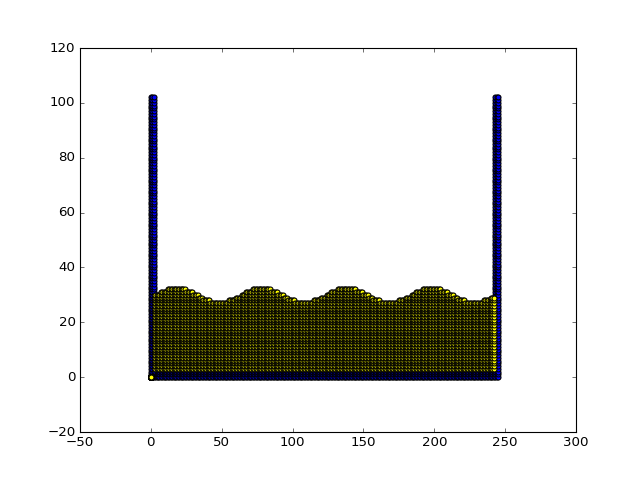

In [135]:
fpx=np.zeros(xLen*yLen)
fpy=np.zeros(xLen*yLen)
wpx=np.zeros(xLen*yLen)
wpy=np.zeros(xLen*yLen)

file=open("wall.txt","r")
num=0
for line in file:
    splitted=line.split()
    wpx[num]=splitted[0]
    wpy[num]=splitted[1]
    num=num+1
    
file=open("fluid.txt","r")
num=0
for line in file:
    splitted=line.split()
    fpx[num]=splitted[0]
    fpy[num]=splitted[1]
    num=num+1
plt.scatter(wpx, wpy)
plt.scatter(fpx, fpy, c="yellow")